## **DATA COLLECTION**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('IRIS.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## **DATA PREPROCESSING**

**Data Cleaning**

In [5]:
data.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

**Outlier Detection and Removal**

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def outliers(str,column):
  plt.figure(figsize=(10,8))
  sns.boxplot(y=data[column])
  plt.title(f'Boxplot of {column} {str}')
  plt.show()

Before Outlier


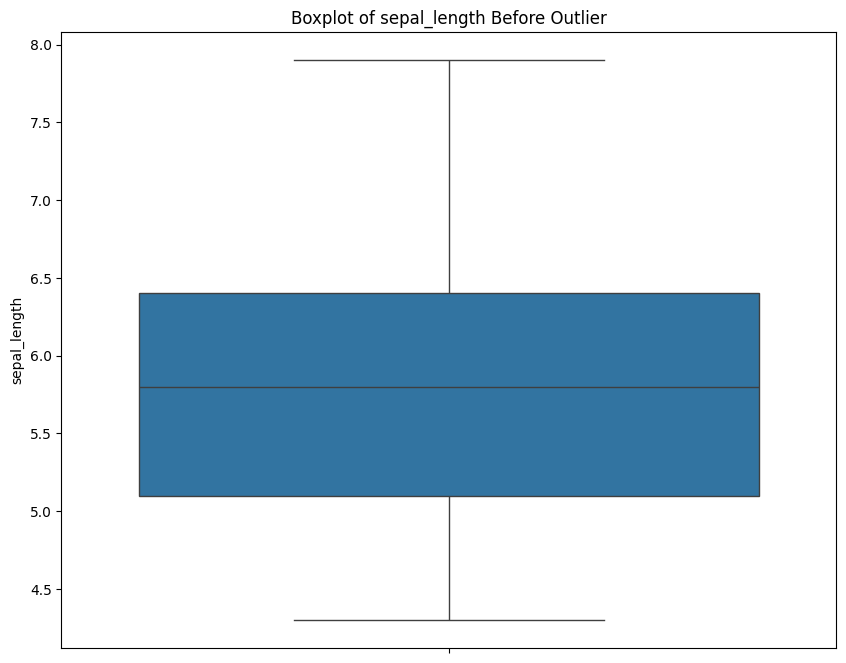

After Outlier


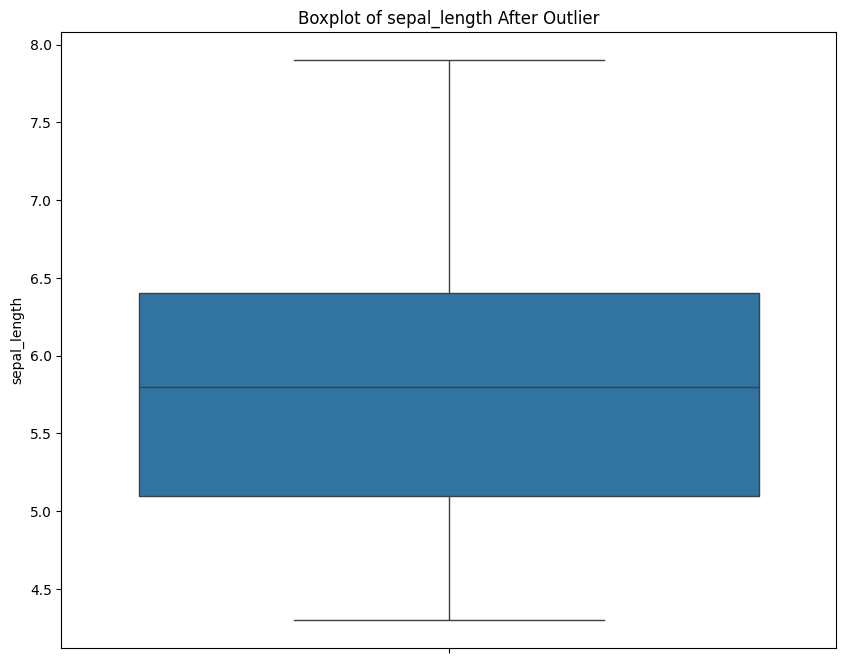

Before Outlier


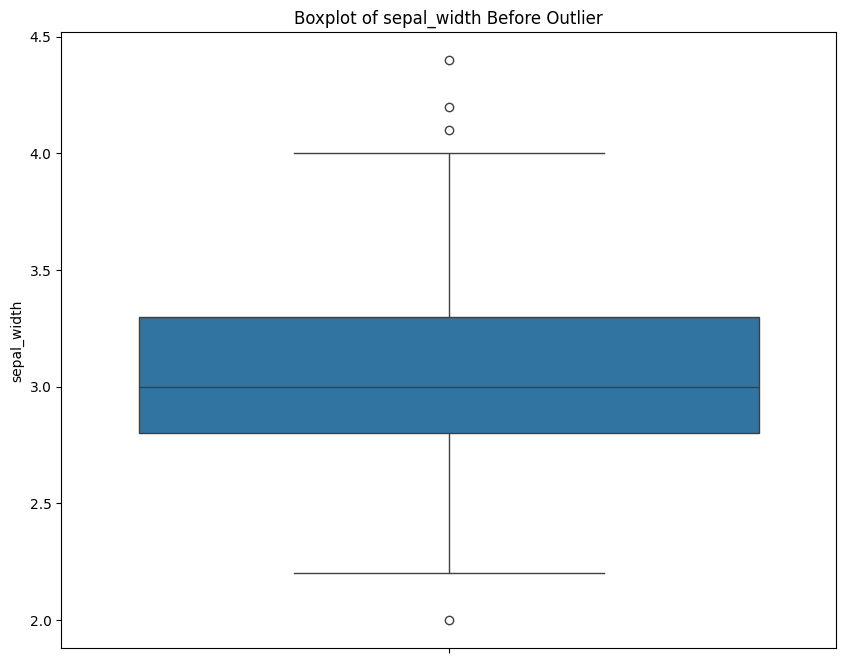

After Outlier


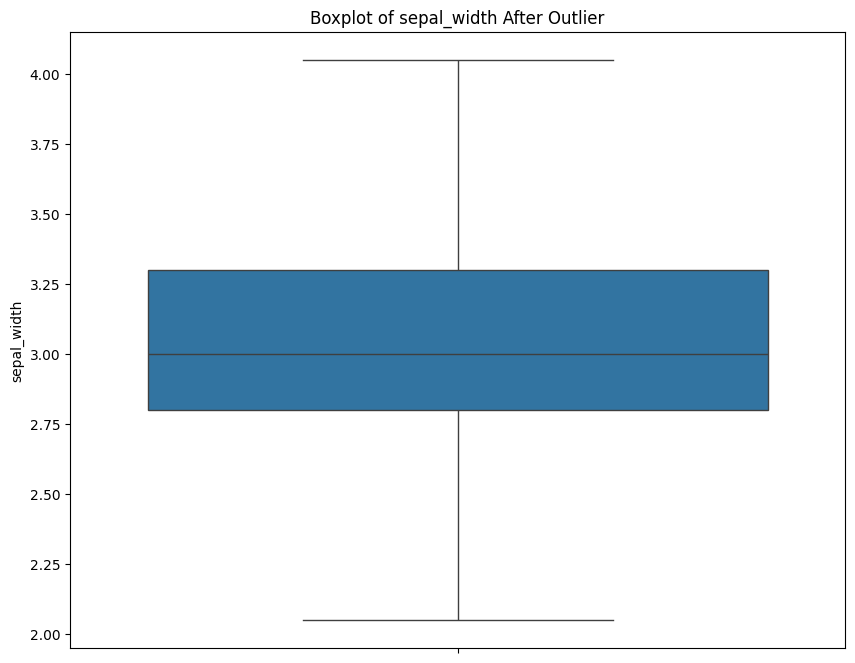

Before Outlier


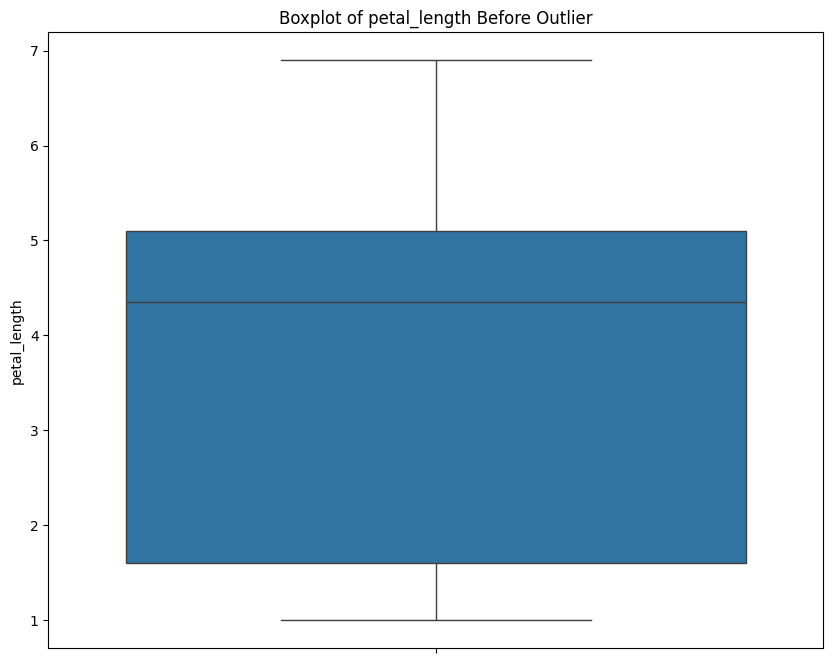

After Outlier


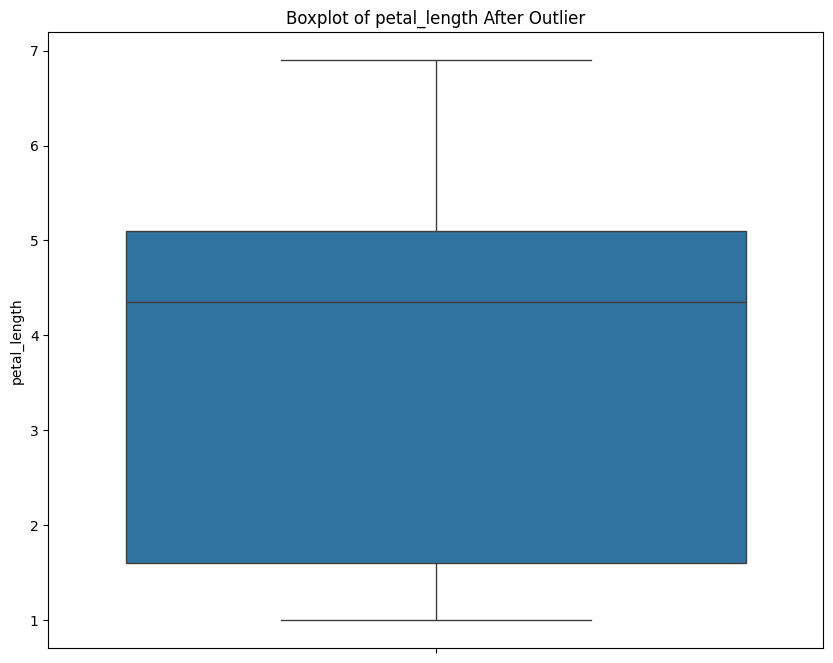

Before Outlier


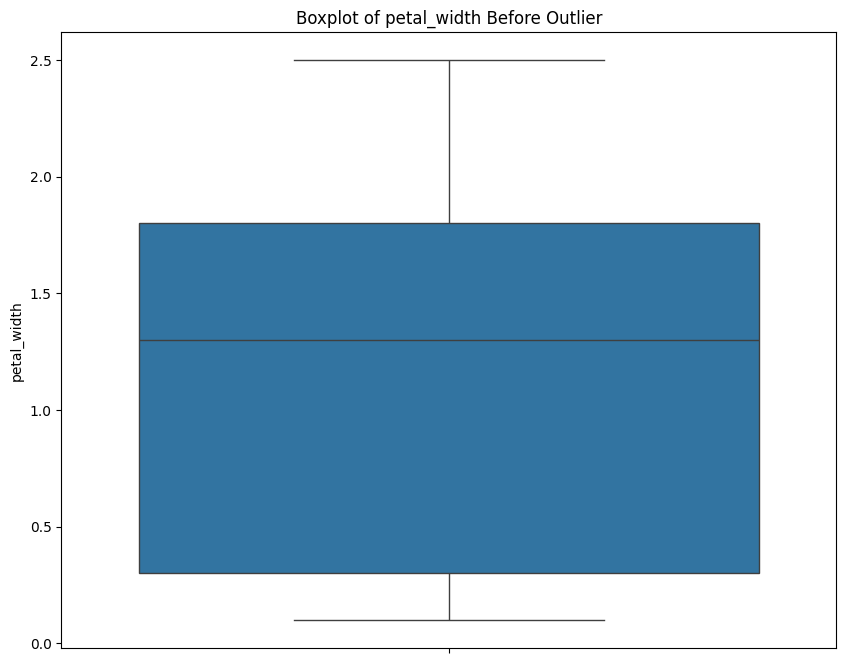

After Outlier


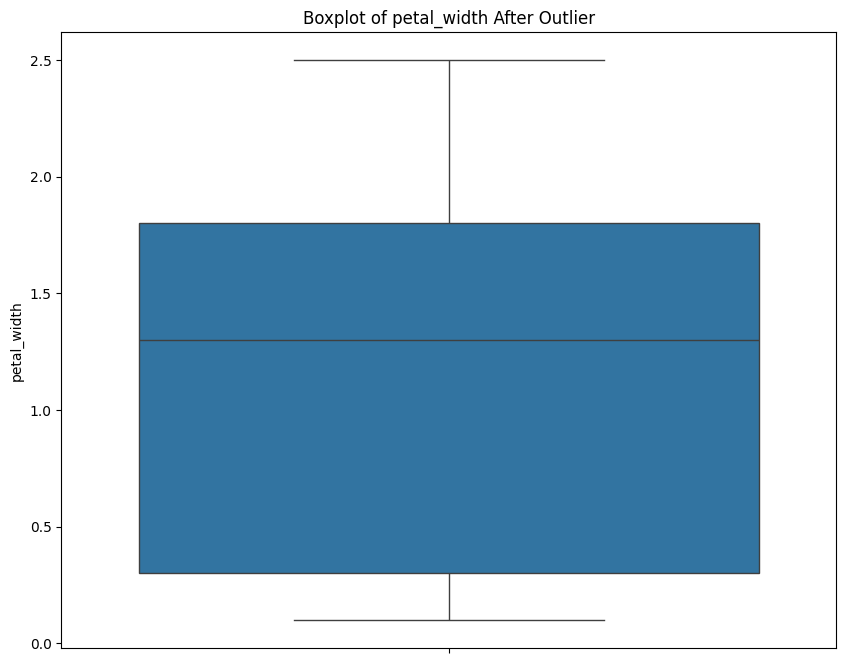

In [8]:
for column in data:

  if data[column].dtype == 'float64':

    print(f"Before Outlier")
    outliers('Before Outlier',column)

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    data.loc[data[column] > upper_limit, column] = upper_limit
    data.loc[data[column] < lower_limit, column] = lower_limit

    print(f"After Outlier")
    outliers('After Outlier',column)

## **DATA VISUALIZATION**

**Pair Plot**

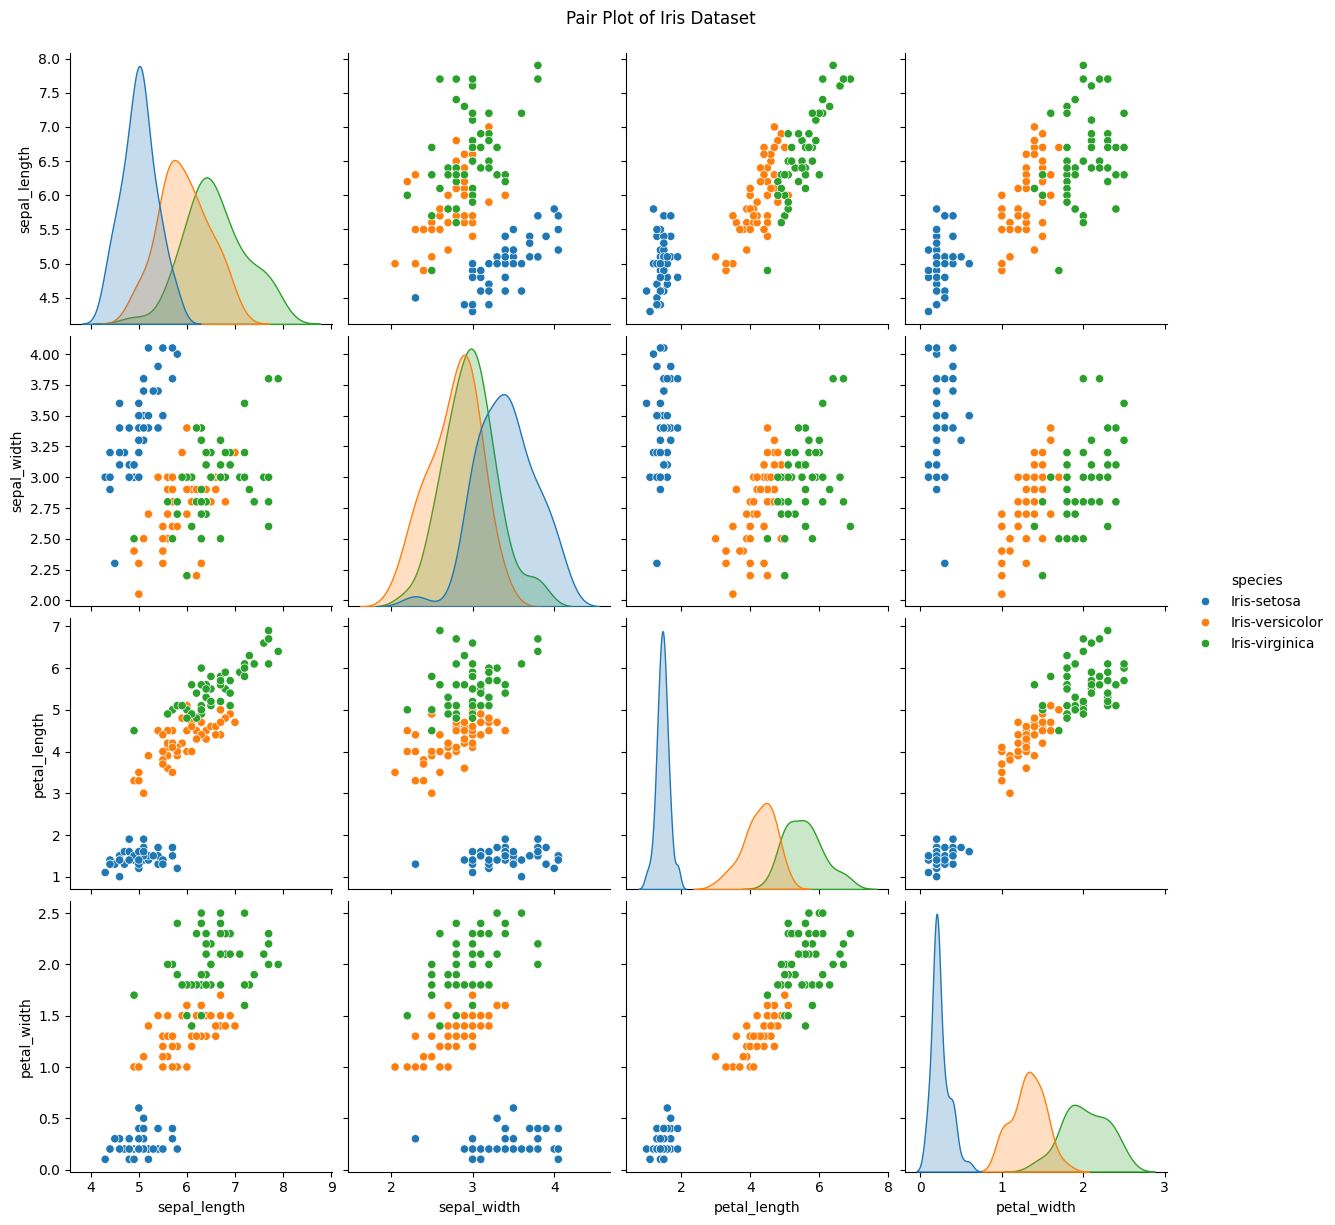

In [9]:
# Pair plot
sns.pairplot(data, hue='species', height=3, aspect=1)
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

**Swarm Plot**

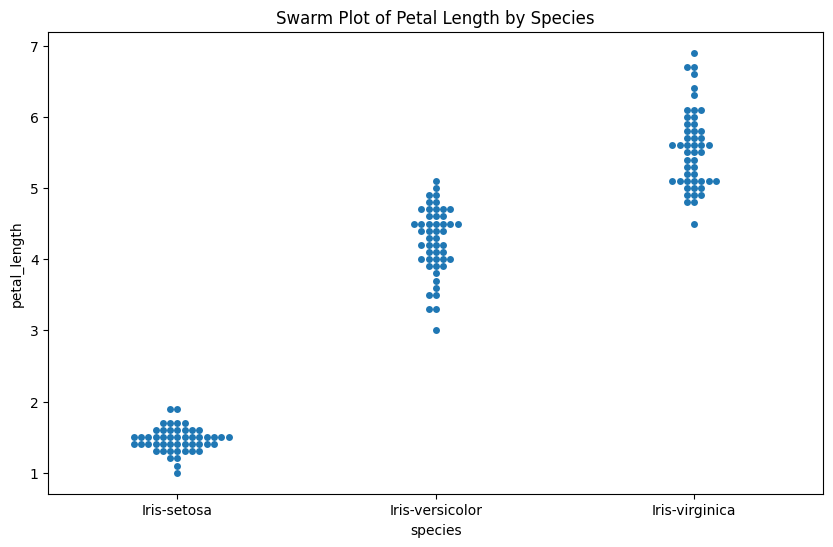

In [10]:
# Swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='species', y='petal_length', data=data)
plt.title('Swarm Plot of Petal Length by Species')
plt.show()


**Box Plot**

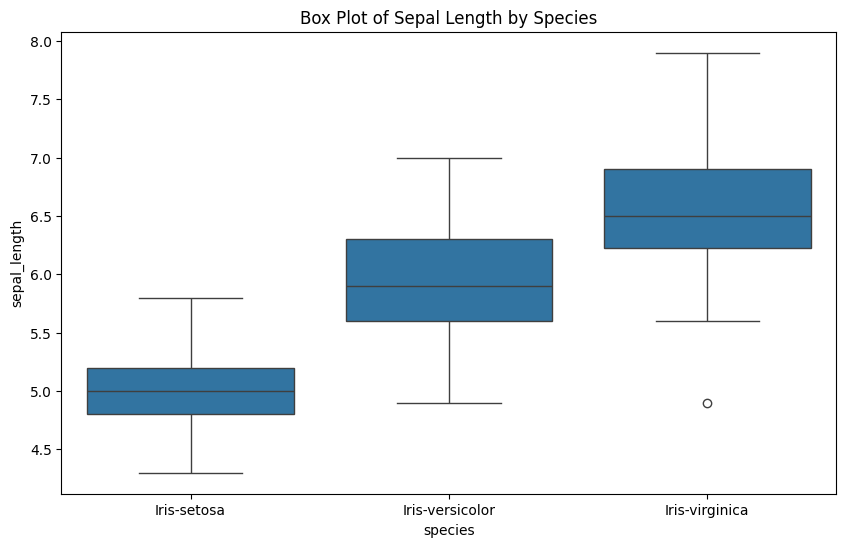

In [11]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_length', data=data)
plt.title('Box Plot of Sepal Length by Species')
plt.show()


**Violin Plot**

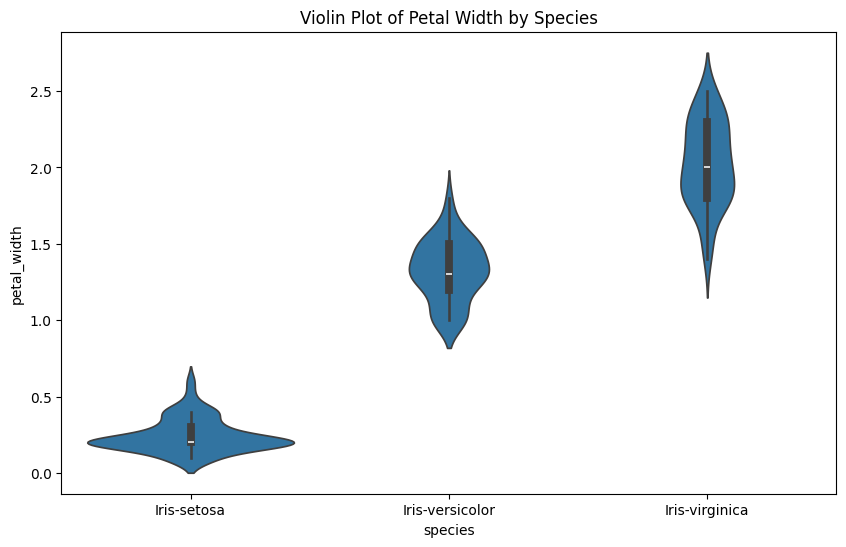

In [12]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='petal_width', data=data)
plt.title('Violin Plot of Petal Width by Species')
plt.show()


**Correlation Heatmap**

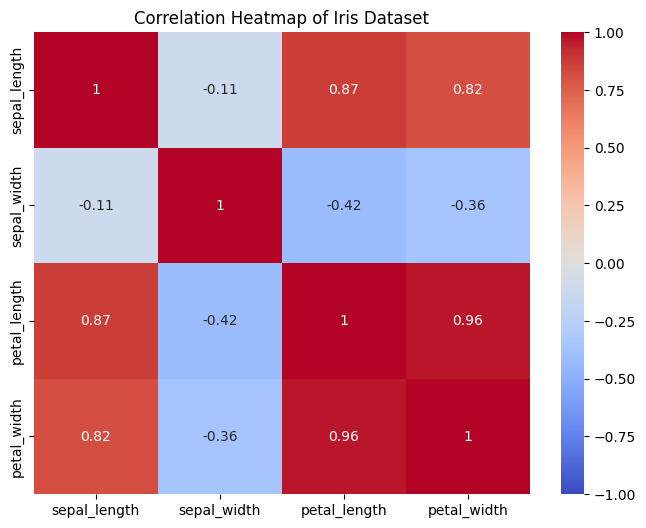

In [13]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
# Select only numerical columns for correlation calculation
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

## **MODEL SELECTION AND MODEL EVALUATION**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay,precision_recall_curve, roc_curve, roc_auc_score,auc
from sklearn.preprocessing import StandardScaler,LabelEncoder


**Label Encoding**

In [16]:
encoding= {}
encoder = LabelEncoder()

for column in data:
  if data.dtypes[column] == 'object':
    data[column] = data[column].astype(str)
    data[column] = encoder.fit_transform(data[column])
    encoding[column] = dict(zip(map(str.lower,encoder.classes_),encoder.transform(encoder.classes_)))
    print(f"{column} : {encoding[column]}")


species : {'iris-setosa': 0, 'iris-versicolor': 1, 'iris-virginica': 2}


In [17]:
def val(column,value):
  return encoding[column][value]

In [18]:
# X as independent variables(input columns) and y as dependent varible(output columns)
X = data.drop('species',axis=1)
y = data['species']


In [19]:
scaler = StandardScaler()

In [20]:
X = scaler.fit_transform(X)

In [21]:
# Data is splitted into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
log_model = LogisticRegression()

#training the model
log_model.fit(X_train, y_train)

#model is predicted with test data
log_pred = log_model.predict(X_test)

Accuracy :  1.0


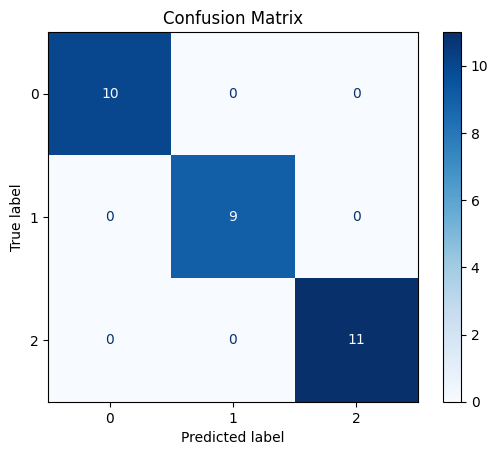

In [23]:

#computing the accuracy of the model
log_accuracy = accuracy_score(y_test, log_pred)
print("Accuracy : ", log_accuracy )

# Compute the confusion matrix
log_cm = confusion_matrix(y_test, log_pred)

# Plot the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_model.classes_)
log_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Print the classification report
print(classification_report(y_test, log_pred, target_names=['iris-setosa', 'iris-versicolor', 'iris-virginica']))

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        10
iris-versicolor       1.00      1.00      1.00         9
 iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [25]:
from sklearn.preprocessing import label_binarize

In [26]:
def curve(model):
  # Precision-Recall Curve (Multiclass)


  # Binarize the output
  y_test_bin = label_binarize(y_test, classes=model.classes_)
  n_classes = y_test_bin.shape[1]

  precision = dict()
  recall = dict()
  for i in range(n_classes):
      precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
      plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

  plt.xlabel("recall")
  plt.ylabel("precision")
  plt.legend(loc="best")
  plt.title("precision vs. recall curve")
  plt.show()

   # ROC Curve (Multiclass)
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  for i in range(n_classes):
      plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                    ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic for multi-class data')
  plt.legend(loc="lower right")
  plt.show()

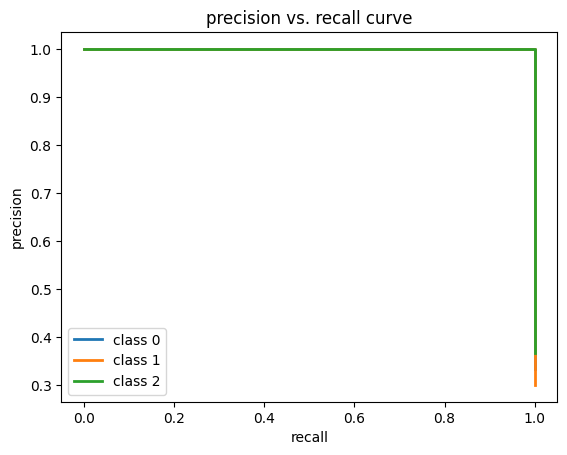

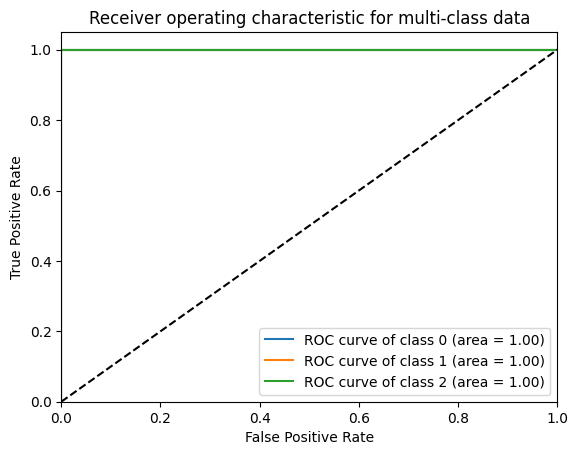

In [27]:
curve(log_model)


**KNeighborsClassifier**

In [28]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

Accuracy :  1.0


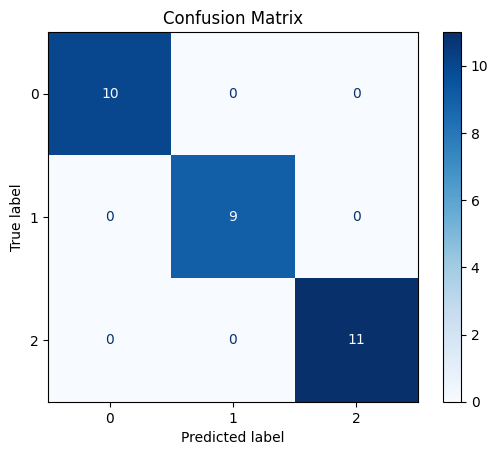

In [29]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy : ", knn_accuracy )

knn_cm = confusion_matrix(y_test, knn_pred)

knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_model.classes_)
knn_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [30]:
# Print the classification report
print(classification_report(y_test, knn_pred, target_names=['iris-setosa', 'iris-versicolor', 'iris-virginica']))

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        10
iris-versicolor       1.00      1.00      1.00         9
 iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



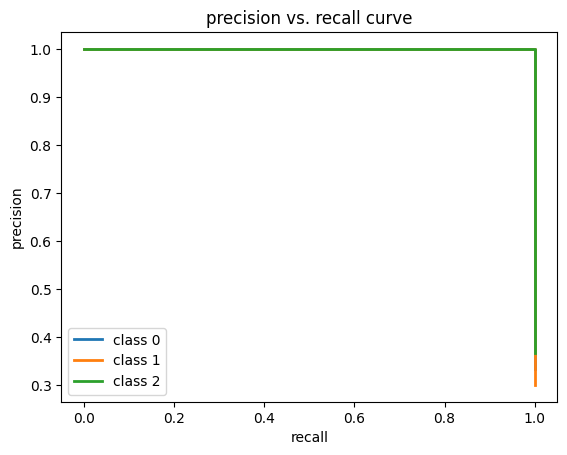

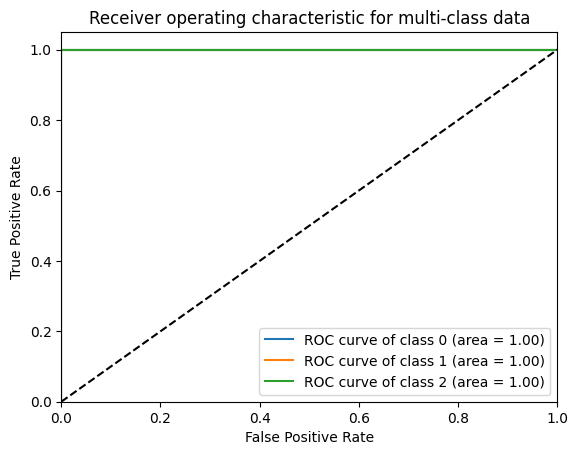

In [31]:
curve(knn_model)

**DecisionTreeClassifier**

In [32]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

Accuracy :  1.0


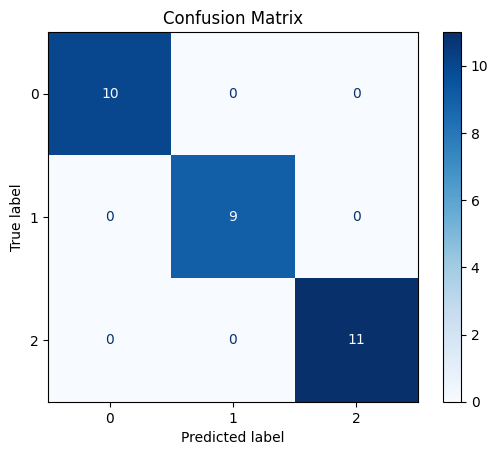

In [33]:
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy : ", dt_accuracy )

dt_cm = confusion_matrix(y_test, dt_pred)

dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt_model.classes_)
dt_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Print the classification report
print(classification_report(y_test, dt_pred, target_names=['iris-setosa', 'iris-versicolor', 'iris-virginica']))

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        10
iris-versicolor       1.00      1.00      1.00         9
 iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



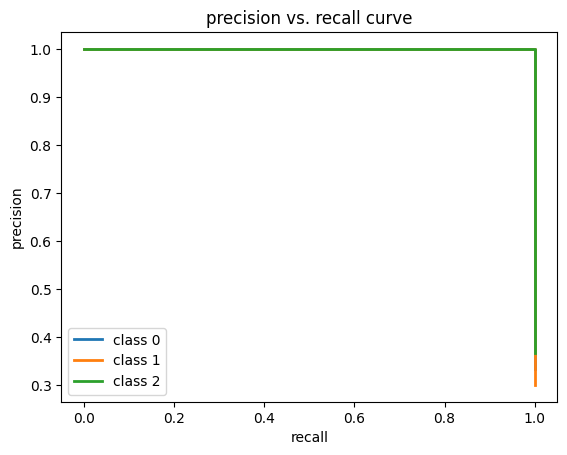

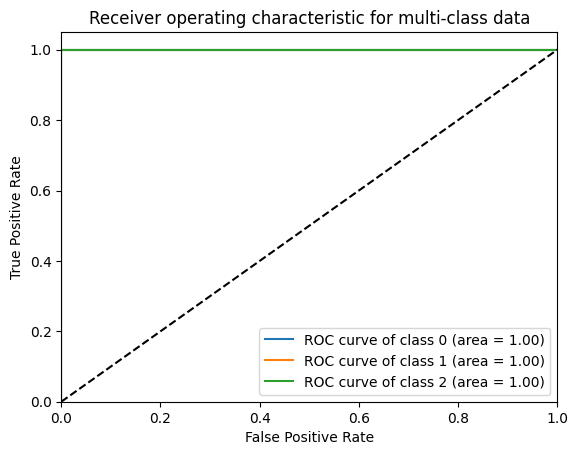

In [35]:
curve(dt_model)

**RandomForestClassifier**

In [36]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

Accuracy :  1.0


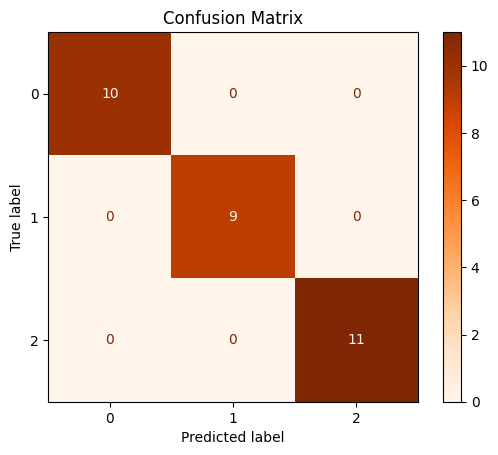

In [37]:
rf_accuracy = accuracy_score(y_test,rf_pred)
print("Accuracy : ", rf_accuracy)

rf_cm = confusion_matrix(y_test,rf_pred)

rf_disp = ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = rf_model.classes_)
rf_disp.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix")
plt.show()

In [38]:
# Print the classification report
print(classification_report(y_test, rf_pred, target_names=['iris-setosa', 'iris-versicolor', 'iris-virginica']))

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        10
iris-versicolor       1.00      1.00      1.00         9
 iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



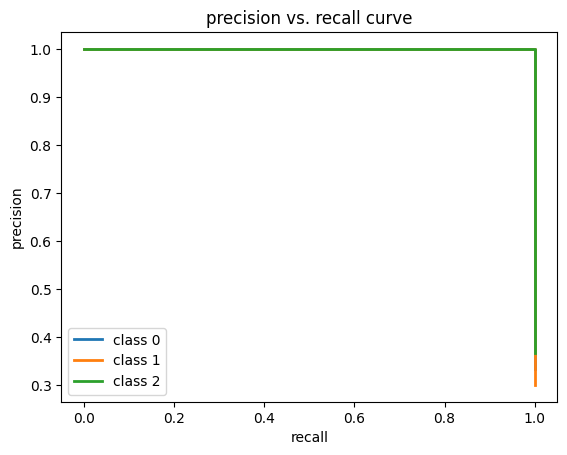

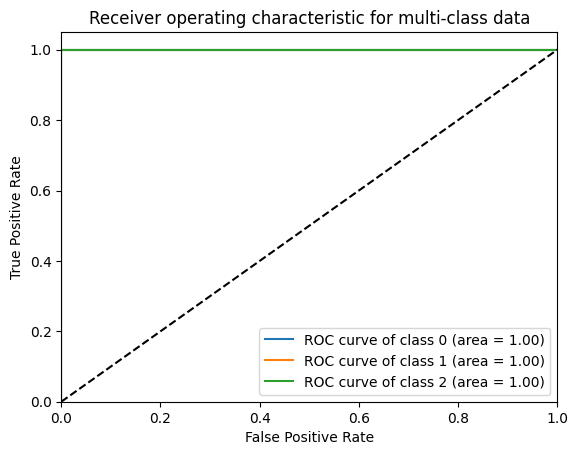

In [39]:
curve(rf_model)

**GradientBoostingClassifier**

In [40]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

Accuracy :  1.0


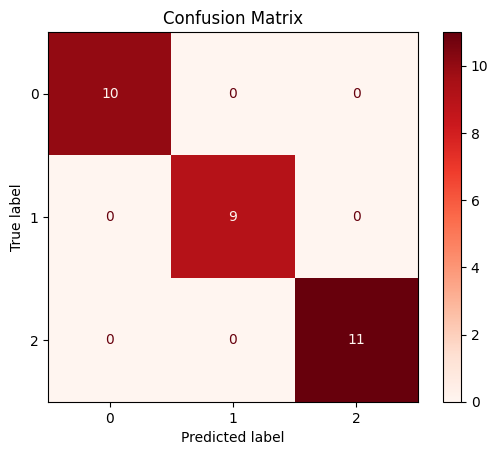

In [41]:
gb_accuracy = accuracy_score(y_test,gb_pred)
print("Accuracy : ", gb_accuracy)

gb_cm = confusion_matrix(y_test,gb_pred)

gb_disp = ConfusionMatrixDisplay(confusion_matrix = gb_cm, display_labels = gb_model.classes_)
gb_disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

In [42]:
# Print the classification report
print(classification_report(y_test, gb_pred, target_names=['iris-setosa', 'iris-versicolor', 'iris-virginica']))

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        10
iris-versicolor       1.00      1.00      1.00         9
 iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



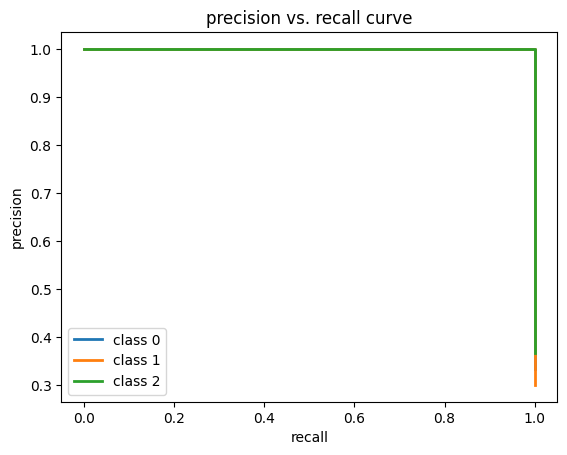

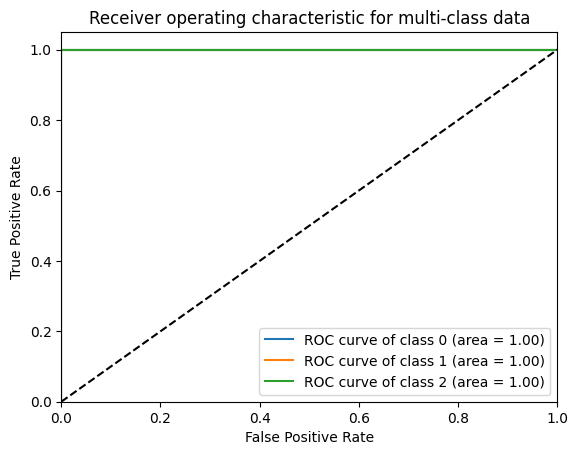

In [43]:
curve(gb_model)

**AdaBoostClassifier**

In [44]:
ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)
ab_pred = ab_model.predict(X_test)

Accuracy :  1.0


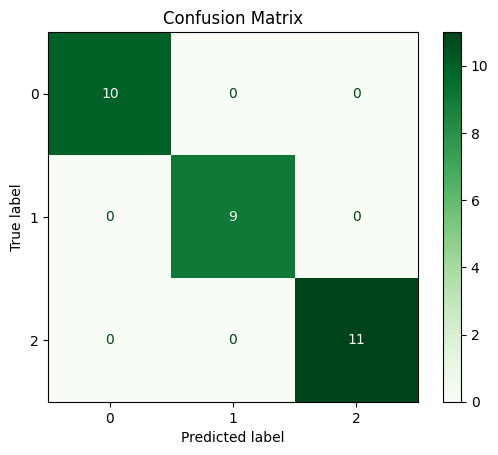

In [45]:
ab_accuracy = accuracy_score(y_test,ab_pred)
print("Accuracy : ", ab_accuracy)

ab_cm = confusion_matrix(y_test,ab_pred)

ab_disp = ConfusionMatrixDisplay(confusion_matrix = ab_cm, display_labels = ab_model.classes_)
ab_disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.show()

In [46]:
# Print the classification report
print(classification_report(y_test, ab_pred, target_names=['iris-setosa', 'iris-versicolor', 'iris-virginica']))

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        10
iris-versicolor       1.00      1.00      1.00         9
 iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



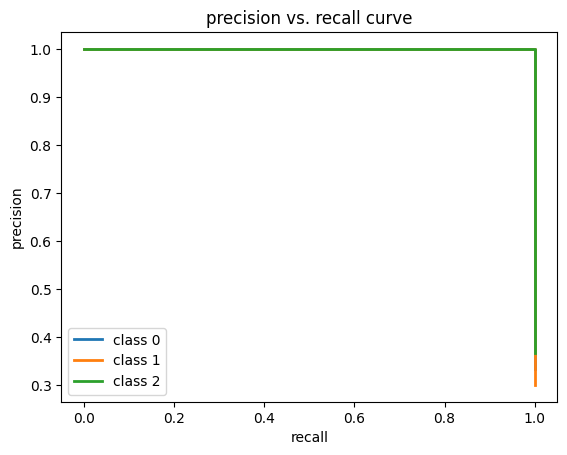

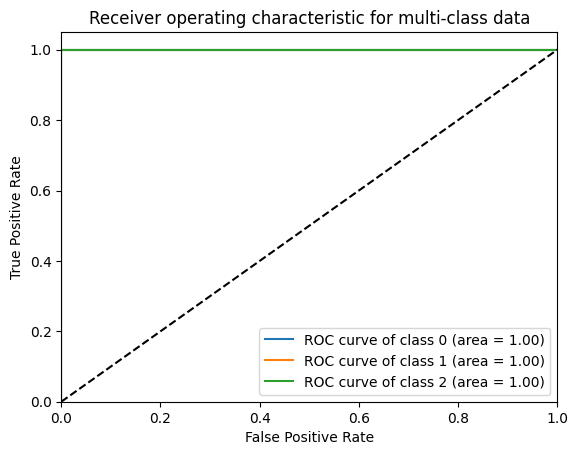

In [47]:
curve(ab_model)

**XGBClassifier**

In [48]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

Accuracy :  1.0


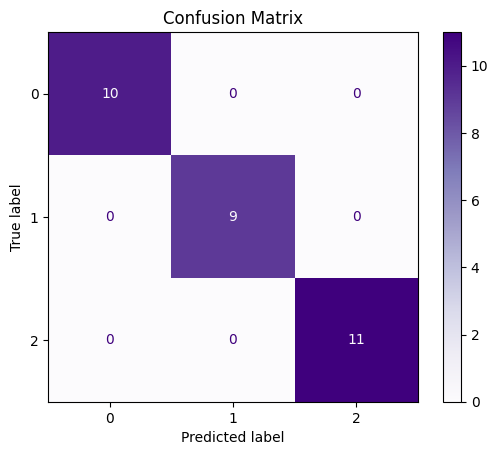

In [49]:
xgb_accuracy = accuracy_score(y_test,xgb_pred)
print("Accuracy : ", xgb_accuracy)

xgb_cm = confusion_matrix(y_test,xgb_pred)

xgb_disp = ConfusionMatrixDisplay(confusion_matrix = xgb_cm, display_labels = xgb_model.classes_)
xgb_disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.show()

In [50]:
# Print the classification report
print(classification_report(y_test, xgb_pred, target_names=['iris-setosa', 'iris-versicolor', 'iris-virginica']))

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        10
iris-versicolor       1.00      1.00      1.00         9
 iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



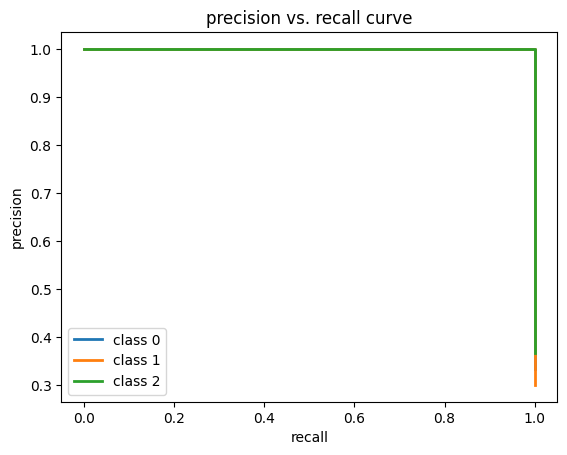

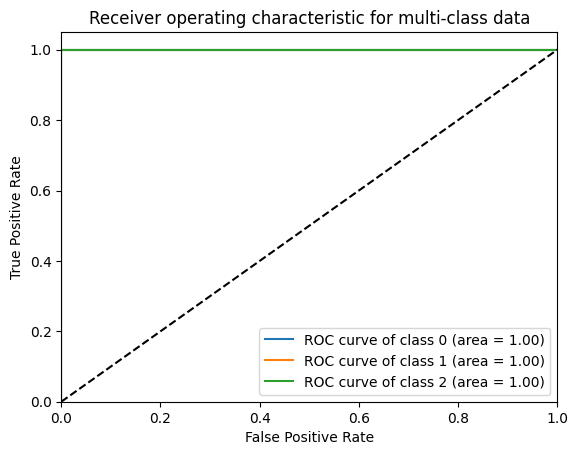

In [51]:
curve(xgb_model)

**SVC**

In [52]:
# Initialize SVC with probability estimation enabled
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)


Accuracy :  1.0


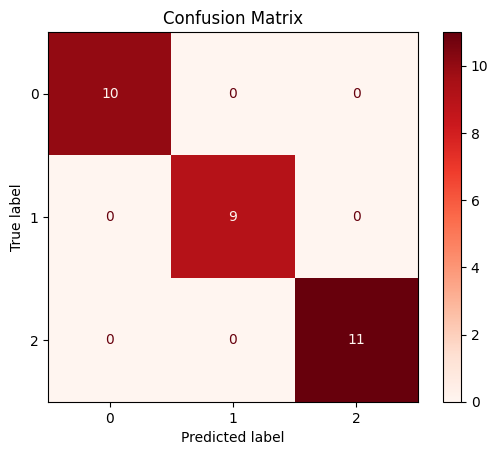

In [53]:
svc_accuracy = accuracy_score(y_test,svc_pred)
print("Accuracy : ", svc_accuracy)

svc_cm = confusion_matrix(y_test,svc_pred)

svc_disp = ConfusionMatrixDisplay(confusion_matrix = svc_cm, display_labels = svc_model.classes_)
svc_disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

In [54]:
# Print the classification report
print(classification_report(y_test, svc_pred, target_names=['iris-setosa', 'iris-versicolor', 'iris-virginica']))

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        10
iris-versicolor       1.00      1.00      1.00         9
 iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



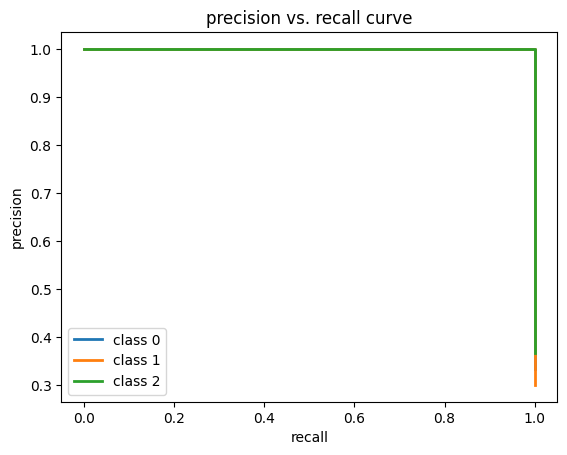

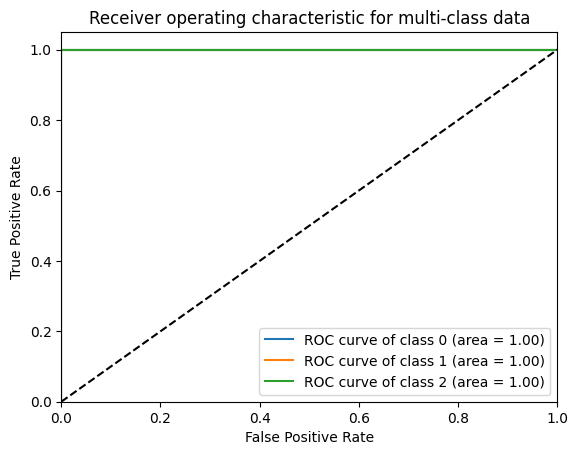

In [55]:
curve(svc_model)

**GaussianNB**

In [56]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)

Accuracy :  1.0


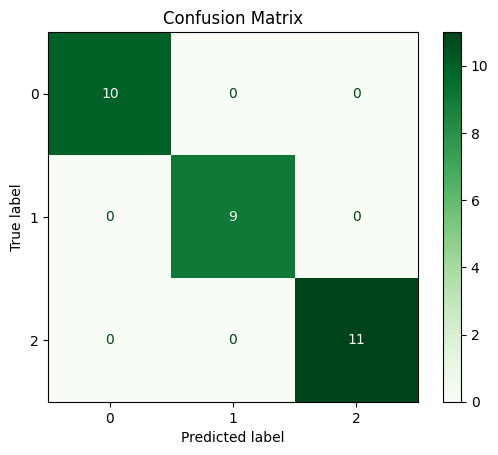

In [57]:
gnb_accuracy = accuracy_score(y_test,gnb_pred)
print("Accuracy : ", gnb_accuracy)

gnb_cm = confusion_matrix(y_test,gnb_pred)

gnb_disp = ConfusionMatrixDisplay(confusion_matrix = gnb_cm, display_labels = gnb_model.classes_)
gnb_disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.show()

In [58]:
# Print the classification report
print(classification_report(y_test, gnb_pred, target_names=['iris-setosa', 'iris-versicolor', 'iris-virginica']))

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        10
iris-versicolor       1.00      1.00      1.00         9
 iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



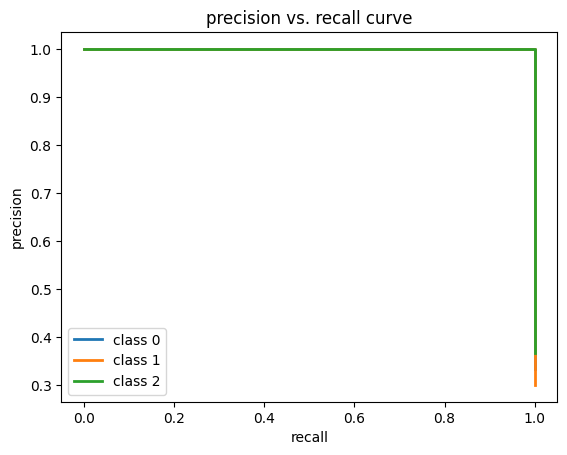

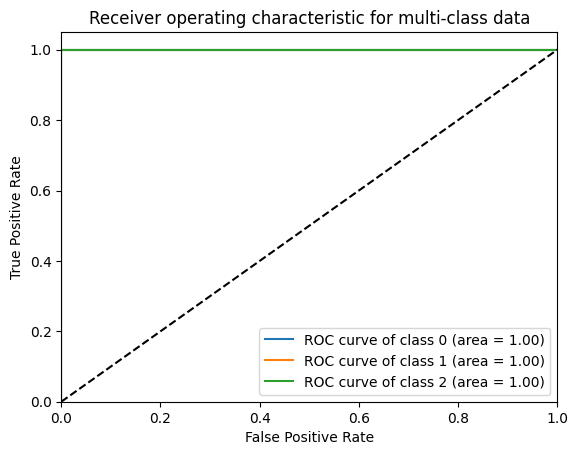

In [59]:
curve(gnb_model)

**MLPClassifier**

In [60]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy :  1.0


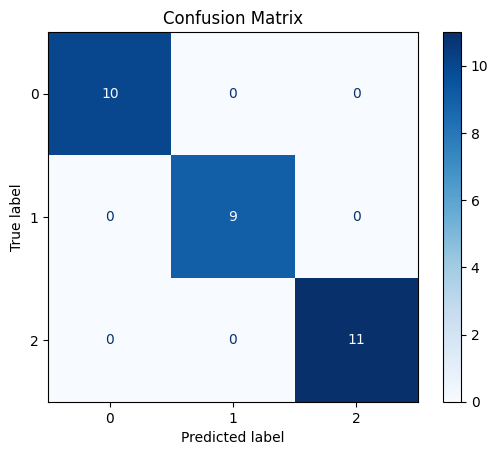

In [61]:
mlp_accuracy = accuracy_score(y_test,mlp_pred)
print("Accuracy : ", mlp_accuracy)

mlp_cm = confusion_matrix(y_test,mlp_pred)

mlp_disp = ConfusionMatrixDisplay(confusion_matrix = mlp_cm, display_labels = mlp_model.classes_)
mlp_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [62]:
# Print the classification report
print(classification_report(y_test, mlp_pred, target_names=['iris-setosa', 'iris-versicolor', 'iris-virginica']))

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        10
iris-versicolor       1.00      1.00      1.00         9
 iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



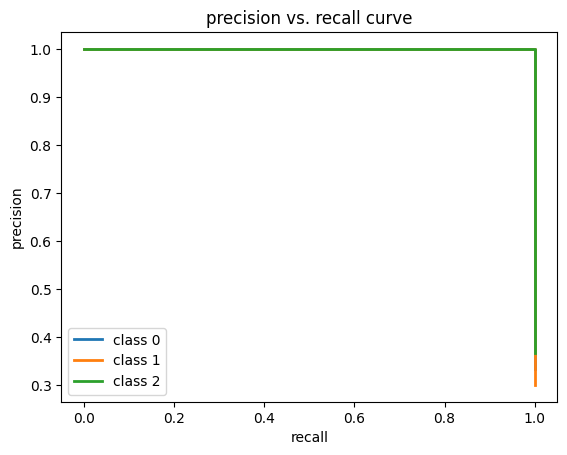

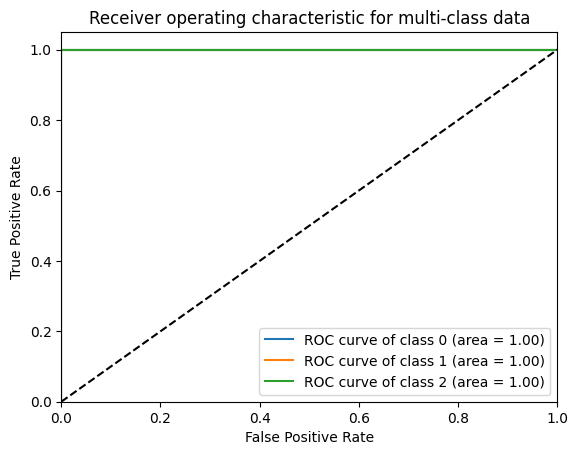

In [63]:
curve(mlp_model)

## **COMPARISON OF MODELS**

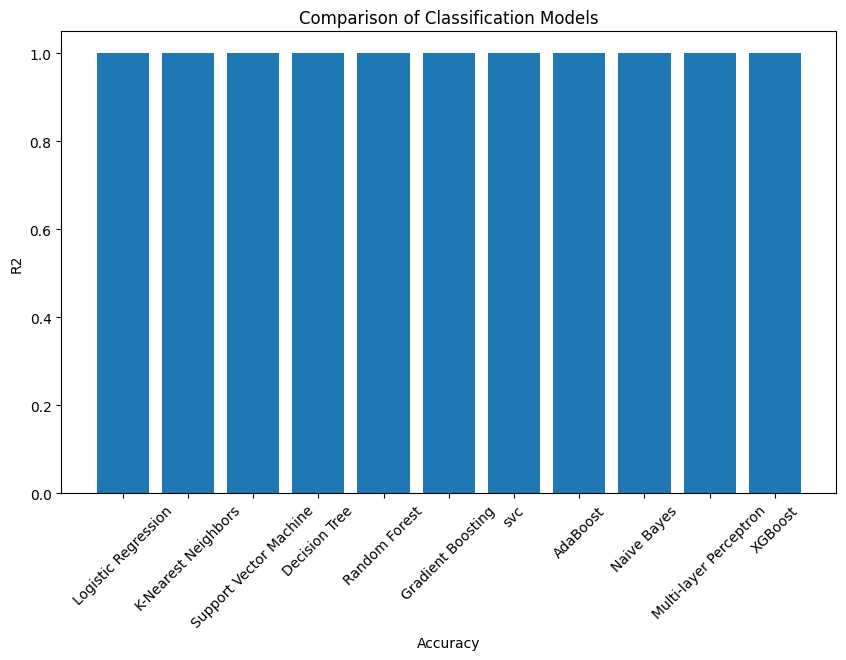

In [64]:

# Create a dictionary to store model names and their R2 values
models_accuracy = {
    "Logistic Regression": log_accuracy,
    "K-Nearest Neighbors": knn_accuracy,
    "Support Vector Machine": svc_accuracy,
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy,
    "Gradient Boosting": gb_accuracy,
    "svc": svc_accuracy,
    "AdaBoost": ab_accuracy,
    "Naive Bayes": gb_accuracy,
    "Multi-layer Perceptron": mlp_accuracy,
    "XGBoost": xgb_accuracy
}

# Sort models by descending order of accuracy
sorted_models_accuracy = dict(sorted(models_accuracy.items(), key=lambda item: item[1],reverse = True))

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(sorted_models_accuracy.keys(), sorted_models_accuracy.values())
plt.title('Comparison of Classification Models')
plt.xlabel('Accuracy')
plt.ylabel('R2')
plt.xticks(rotation=45)
plt.show()


**TESTING FOR NEW INPUTS USING RANDOM FOREST**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
sepal_length = input("Enter sepal_length : ")
sepal_width = input("Enter sepal_width : ")
petal_length = input("Enter petal_length : ")
petal_width = input("Enter petal_width : ")

Enter sepal_length : 5.9
Enter sepal_width : 3
Enter petal_length : 5.1
Enter petal_width : 1.8


In [ ]:
new_input = scaler.transform(pd.DataFrame([[sepal_length,sepal_width,petal_length,petal_width]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**PREDICTION**

In [ ]:
new_pred = rf_model.predict(new_input)

In [ ]:
class_labels = ['iris-setosa', 'iris-versicolor', 'iris-virginica']

In [ ]:
predicted_labels = [class_labels[prediction] for prediction in new_pred]

In [ ]:
print(predicted_labels)

['iris-virginica']
